# The Analysis Of Residuals

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tabulate
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy.linalg import inv

$ y = \beta X + \epsilon$ <br>
$ \epsilon(residuals) = y - \beta X$ <br>
$\epsilon(residuals) = y - \hat y$

Basic assumptions about residuals.

$\epsilon_{t} ; (0, \sigma_{t}^2) $ <br><br>
$V(\epsilon_{t}) = \sigma_{t}^2 $ <br><br>
$Cov(\epsilon_{t},\epsilon_{t-1})= 0 $ <br><br>
$\epsilon_{t} ; N(0, \sigma_{t}^2) $ <br><br>

In [215]:
data=pd.read_excel('RedDat.xlsx')

In [216]:
data.head()

,y,x1,x2,x3
0,42,80,27,89
1,37,80,27,88
2,37,75,25,90
3,28,62,24,87
4,18,62,22,87


### Hat Matrix

$ \hat{y}=Hy$ <br>
$H$ is hat or projection matrix

In [218]:
# describing variables
y=np.array(data.iloc[:,0:1])
indep=np.array(data.iloc[:,1:])
cons=np.ones(len(y))
n=len(data)
m=data.shape[1]-1

In [219]:
#Basic Matrix
X=np.column_stack((cons,indep))
X_trans=np.transpose(X)
Xx=X_trans.dot(X)
X_inv=inv(Xx)
x=X.dot(X_inv)
H=x.dot(X_trans)

In [220]:
resids=y-H.dot(y)

In [221]:
resids

array([[ 3.23463723],
       [-1.91748529],
       [ 4.555533  ],
       [ 5.69777417],
       [-1.71165358],
       [-3.0069397 ],
       [-2.38949071],
       [-1.38949071],
       [-3.1443789 ],
       [ 1.26719408],
       [ 2.63629676],
       [ 2.77946036],
       [-1.42856088],
       [-0.05049929],
       [ 2.36141836],
       [ 0.9050508 ],
       [-1.51995059],
       [-0.45509295],
       [-0.59825656],
       [ 1.41214728],
       [-7.23771286]])

In [222]:
leverage_val=np.diag(H)

In [223]:
leverage_val

array([0.30155547, 0.31784096, 0.17461501, 0.12850524, 0.05222033,
       0.07748736, 0.21923676, 0.21923676, 0.14018363, 0.20004426,
       0.15503318, 0.21717597, 0.15753146, 0.20582288, 0.19046486,
       0.1310737 , 0.4121235 , 0.16059272, 0.17453663, 0.08018585,
       0.28453346])

### Standardized Residuals

### $S^2 = \frac{\sum(y_{i}-\hat{y_{i}})^2}{n-m}$ <br>
### $d_{i}=\frac{\epsilon_{i}}{S}$

In [224]:
#The Variance
S_square=np.sum(resids**2)/(n-m)

In [225]:
di=resids/np.sqrt(S_square)
di_abs=np.abs(di)

In [226]:
for i in di_abs:
    if i >2 and i<3:
        print(np.where(di_abs == i))

(array([20], dtype=int64), array([0], dtype=int64))


In [227]:
di_abs[20]

array([2.29624096])

### Durbin-Watson Test

## $d=\frac{\sum_{i=2}^n(\epsilon_{i}-\epsilon_{i-1})^2}{\sum_{i=1}^n\epsilon_{i}^2}$

In [228]:
from statsmodels.stats.stattools import durbin_watson

In [229]:
print(durbin_watson(resids))

[1.48513103]


### CUSUM Tests

In [232]:
model=sm.RecursiveLS(y,X).fit()

[ 0.31760936 -0.94731545 -3.28289985 -3.46487275 -4.30484993 -3.92137864
 -3.36831769 -3.26137738 -4.06889558 -4.43248869 -3.55456901 -3.20308807
 -3.16806753 -2.99226831 -2.7702551  -2.3246957  -4.99914299]
Figure(640x480)
Figure(640x480)


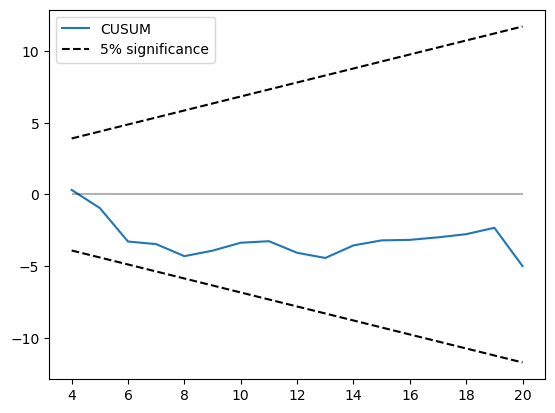

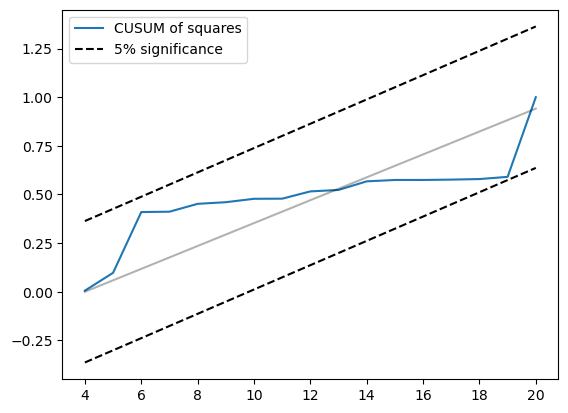

In [240]:
print(model.cusum)
print(model.plot_cusum())
print(model.plot_cusum_squares())